<a href="https://colab.research.google.com/github/financieras/math/blob/main/ia/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

## Caso 1. Averiguar los pesos de dos exámenes en la nota final
[Redes neuronales](https://www.xataka.com/robotica-e-ia/las-redes-neuronales-que-son-y-por-que-estan-volviendo)

[Pesos y umbrales](https://trucosexcel.blogspot.com/2018/05/pesos-y-umbrales.html)

[Puntos linealmente separables](https://trucosexcel.blogspot.com//2018/05/puntos-linealmente-separables.html)

* Tenemos las notas de dos exámenes n1 y n2. Las notas de cada examen están en el rango [0, 10].
* Cada examen tiene un peso w1 y w2 para promediar en la nota final.
* Si la nota final es mayor o igual a 5 el alumno aprueba (1) y en caso contrario suspende (0).

* Se trata de obtener los pesos w1 y w2 que se usaron para determinar si un gran número de alumnos aprobaron (1) o suspendieron (0).


## Descripción
* Establezcamos los pesos que luego tendremos que estimar ($\omega_1$, $\omega_2$).
* Esto se hace para generar datos de parejas de notas de los dos exámenes.
* Generaremos un gran número de parejas de notas ($n_1$, $n_2$).
* Cada pareja de notas se pondera con los pesos ($\omega_1$, $\omega_2$) y esto da lugar a una nota final.
* Si la nota final es mayor o igual a 5 el alumno aprueba (1) y en caso contrario el alumno suspende (0).
* Por lo tanto, en el modelo tendremos un gran número de notas ($n_1$, $n_2$) y por cada pareja un 1 o un 0, que indicarán si el alumno aprueba o suspende.
* Supongamos que son 1000 parejas de notas de entrada y un vector de ceros y unos con mil datos de salida.
* Nuestro objetivo es determinar los pesos ($\omega_1$, $\omega_2$) que internamente permitieron que esas notas de entrada se convirtieran en ese vector de salida.

## Paso 1. Pesos establecidos
* Establezcamos los pesos que luego tendremos que estimar ($\omega_1$, $\omega_2$).
* Siempre se cumple que los pesos se dan en tanto por uno y su suma es 1.
* $0 \leq  \omega_1 \leq 1$
* $\omega_1 + \omega_2 = 1$

In [41]:
w1_real = 0.284      # dato que nos inventamos y luego tendremos que estimar
w2_real = 1 - w1_real
w1_real, w2_real

(0.284, 0.716)

## Paso 2. Matriz con las parejas de notas y calificación final
* Generación de 1000 parejas de notas ($n_1$, $n_2$) en forma de matriz.
* Las notas varían entre 0 y 10 de forma aleatoria.
    1. La nota 1 ($n1$) se guarda en el index 1 de la matriz
    2. La nota 2 ($n2$) se guarda en el index 2 de la matriz
    3. En el index 0 de la matriz se calcula la Calificación Final.
* La calificación final se obtiene aplicando, a cada pareja de notas, los pesos ($\omega_1$, $\omega_2$) para obtener la Nota Final.
* Convertimos esa Nota Final que varía entre 0 y 10 en un booleano que será la Calificación Final, considerando que:
    - Si la nota final es mayor o igual a la nota de aprobado el alumno aprueba: booleano 1
    - En caso contrario el alumno suspende: booleano 0
* La nota de aprobado se establece en 5.

In [42]:
import random
random.seed()

n = 1000            # número de parejas de notas
nota_de_aprobado = 5
notas = []          # matriz con las parejas de notas y la calificación final

for i in range(n):
    n1 = random.random() * 10
    n2 = random.random() * 10
    nota_binaria = int(n1 * w1_real + n2 * w2_real >= nota_de_aprobado)
    notas.append([nota_binaria, n1, n2])

#notas

## Paso 3. Estimar unos pesos
* Ya tenemos todos los datos necesarios en la matriz notas.
* Ahora procede comenzar el proceso estimando unos pesos para comenzar el algoritmo.
* Los valores estimados iniciales para los pesos ($\omega_1$, $\omega_2$)  serán:

In [43]:
w1 = 0.2
w2 = 1 - w1
w1, w2

(0.2, 0.8)

## Paso 4. Errores obtenidos con esos pesos
* Usando los pesos establecidos inicialmente vamos a determinar cuántos errores hay al analizar todas las parejas de notas que tenemos en nuestro DataSet.
* El Error se calcula restando la salida real de la que nos da el modelo.

In [44]:
suma_errores = 0

for nota in notas:
    nota_estimada = nota[1] * w1 + nota[2] * w2
    resultado_estimado = 1 if nota_estimada >= 5 else 0
    #print(resultado_estimado, nota[0], nota[0] - resultado_estimado)
    error = nota[0] - resultado_estimado
    #print(error)
    suma_errores += abs(error)

print("Total errores:", suma_errores)

Total errores: 37


## Paso 5. Grafico de Errores frente a pesos
* Hagamos variar $\omega_1$ entre 0 y 1 en pasos de 0.1.
* Para cada peso se calculan los errores producidos y se hace un gráfico.

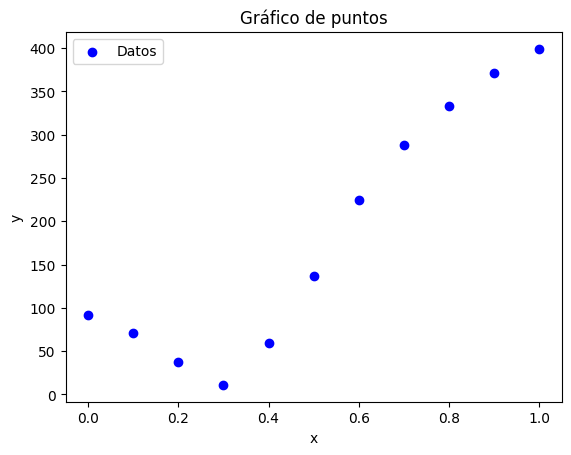

In [49]:
import numpy as np
import matplotlib.pyplot as plt


errores = []
for w1 in range(11):
    w1 *= 0.1
    w2 = 1 - w1
    suma_errores = 0
    for nota in notas:
        nota_estimada = nota[1] * w1 + nota[2] * w2
        resultado_estimado = 1 if nota_estimada >= 5 else 0
        error = nota[0] - resultado_estimado
        suma_errores += abs(error)
    errores.append(suma_errores)

# Convertir 'errores' en un array de NumPy
errores_array = np.array(errores)       # variable y

# Generar los valores de x
x = np.arange(0, 1.1, 0.1)  # De 0 a 1 con intervalos de 0.1

# Crear el gráfico
plt.scatter(x, errores_array, color='blue', label='Datos')

# Añadir etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de puntos')
plt.legend()

# Mostrar el gráfico
plt.show()

## Paso 9. Algoritmo Descenso del gradiente
* Vamos a ir variando el valor del peso $\omega_1$ y por ende del peso $\omega_2$, la variación o incremento de $\omega$ será lo que conocemos como 'paso'
* El paso inicialmente será del 1% sobre el peso máximo que es 1, por lo tanto será p = 0.01
* Calculamos la Calificación final del alumno (0 o 1) que tendría con cada pareja de notas, aplicando los nuevos pesos.
* Esto se hace para todas las parejas de notas y se calcula el Error producido.
* El Error  es el número de Calificaciones finales (vector de ceros y unos) que difiere de las Calificaciones finales reales (el vector de ceros y unos reales).

In [46]:
p = 1 / 100     # paso
